<a href="https://colab.research.google.com/github/juliapimentelma/desafio-unifacisa/blob/main/Questao_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import dataset de doenças cardiacas
# data 07/10/2025
# disciplina desafio unifacisa - dados e ia
# autor: Júlia Pimentel

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # TEST x TREINO
from sklearn.preprocessing import StandardScaler # aplicar a desnormalização dos dados e NORMALIZAÇÃO
from sklearn.ensemble import RandomForestClassifier #algoritmo de classificação
from sklearn.metrics import classification_report #matriz de confusão de avaliação do modelo
from sklearn.svm import SVC # Import the SVC class
from sklearn.cluster import KMeans # Import KMeans for clustering
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juliamapimentel","key":"e010b72dc72852a5354bb56b6b457beb"}'}

In [ ]:
pip install kaggle -q

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 44.1MB/s]


In [ ]:
!unzip heart-disease-data.zip -d heart_data

Archive:  heart-disease-data.zip
  inflating: heart_data/heart_disease_uci.csv  


In [ ]:
# carregar data frame
df = pd.read_csv('/content/heart_data/heart_disease_uci.csv')

# mostrar as 5 primeiras amostras
display(df.head())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# salvando como CSV
df.to_csv('heart_disease_uci.csv', index=False)
print("CSV salvo com sucesso!")

CSV salvo com sucesso!


In [ ]:
# lidar com valores nulos
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# normalização dos dados das colunas
scaler = StandardScaler()
df_clean = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]
data_scaled = scaler.fit_transform(df_clean)

In [ ]:
# Pré-processamento e Encoding de Colunas Categóricas
df_encoded = pd.get_dummies(df.drop(['id', 'dataset'], axis=1), drop_first=True)

# Definir X e y
X = df_encoded.drop('num', axis=1) # Todas as colunas, exceto a variável alvo
y = df_encoded['num']             # A sua variável alvo multiclasse (0, 1, 2, 3, 4)

In [ ]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [ ]:
# Dividindo em teste x treino
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# modelo random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train) #TREINANDO

RandomForestClassifier(random_state=42)

In [ ]:
# Avaliação do RANDOM FOREST
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        75
           1       0.47      0.50      0.49        54
           2       0.32      0.24      0.27        25
           3       0.38      0.19      0.26        26
           4       0.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.38      0.37      0.36       184
weighted avg       0.53      0.57      0.54       184



In [ ]:
# modelo SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(x_train_imputed, y_train) #TREINANDO

SVC(C=1, random_state=42)

In [ ]:
# Avaliação do SVM
y_pred = svm.predict(x_test_imputed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.97      0.65        75
           1       0.27      0.17      0.21        54
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         4

    accuracy                           0.45       184
   macro avg       0.15      0.23      0.17       184
weighted avg       0.28      0.45      0.32       184



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Treinamento dos Modelos:
svm_model = SVC(probability=True, random_state=42).fit(x_train, y_train)

# Obter as Probabilidades de TODAS as classes
rf_y_prob = rf_model.predict_proba(x_test)
svm_y_prob = svm_model.predict_proba(x_test)

# Cálculo RF
rf_auc = roc_auc_score(
    y_test,
    rf_y_prob,
    multi_class='ovr',
    average='weighted'
)

# Cálculo SVM
svm_auc = roc_auc_score(
    y_test,
    svm_y_prob,
    multi_class='ovr',
    average='weighted'
)

print(f"ROC-AUC (Random Forest): {rf_auc:.4f}")
print(f"ROC-AUC (SVM): {svm_auc:.4f}")

ROC-AUC (Random Forest): 0.8213
ROC-AUC (SVM): 0.7194


Top 5 Variáveis Mais Impactantes (Feature Importance):
    Feature  Importancia
0       age     0.136314
3    thalch     0.128735
2      chol     0.127689
4   oldpeak     0.113863
1  trestbps     0.104227


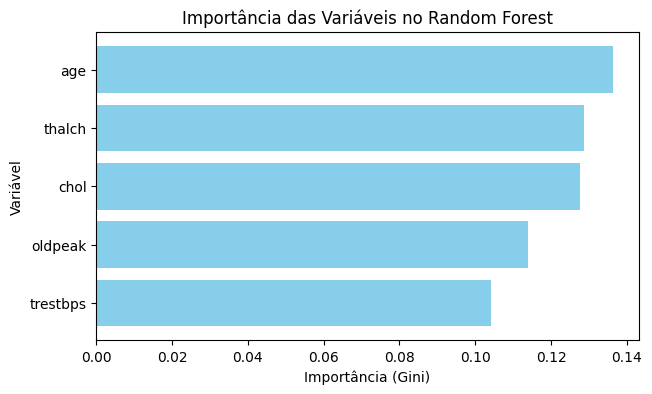

In [ ]:
# Obter a importância das features (variáveis)
importancia = rf_model.feature_importances_

# Obter os nomes das features do seu conjunto X_test (ou X_train)
nomes_features = x_test.columns

# Criar um DataFrame para facilitar a visualização e ordenação
df_importancia = pd.DataFrame({
    'Feature': nomes_features,
    'Importancia': importancia
})

# 4. Ordenar do mais importante para o menos importante
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# 5. Imprimir e Plotar (exibindo apenas as 10 mais importantes)
print("Top 5 Variáveis Mais Impactantes (Feature Importance):")
print(df_importancia.head(5))

plt.figure(figsize=(7, 4))
plt.barh(df_importancia['Feature'].head(5), df_importancia['Importancia'].head(5), color='skyblue')
plt.xlabel('Importância (Gini)')
plt.ylabel('Variável')
plt.title('Importância das Variáveis no Random Forest')
plt.gca().invert_yaxis() # Coloca a mais importante no topo
plt.show()